In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


df = pd.read_excel('data (2).xlsx')

print(df.head())

print(df.info())

print(df.describe())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invo

In [2]:
# Check current data types
print(df.dtypes)

# Convert 'Customer ID' to integer if it's stored as float but should be an integer
df['Customer ID'] = df['Customer ID'].fillna(0).astype(int)

# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')  # 'coerce' will set invalid parsing as NaT

# Convert a categorical column to 'category' type for memory efficiency
df['Country'] = df['Country'].astype('category')

# Re-check data types after conversions
print(df.dtypes)


Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID             int32
Country              category
dtype: object


In [3]:
import pandas as pd
from datetime import datetime


# 1. Remove rows with missing 'Customer ID'
df = df.dropna(subset=['Customer ID'])

# 2. Remove rows with negative or zero 'Quantity' and 'Price'
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

# 3. Aggregate data at the customer level
customer_df = df.groupby('Customer ID').agg(
    TotalSpend=pd.NamedAgg(column='Price', aggfunc='sum'),
    PurchaseFrequency=pd.NamedAgg(column='Invoice', aggfunc=pd.Series.nunique),
    # Assuming 'InvoiceDate' is already a datetime object
    Recency=pd.NamedAgg(column='InvoiceDate', aggfunc=lambda x: (datetime.now() - x.max()).days)
)

# Calculate 'AverageBasketValue'
customer_df['AverageBasketValue'] = customer_df['TotalSpend'] / customer_df['PurchaseFrequency']




In [4]:
def categorize_product(description):
    if pd.isna(description):
        return 'Unknown'
    description = description.lower()
    if 'light' in description:
        return 'Lighting'
    elif 'frame' in description:
        return 'Frames'
    elif 'ceramic' in description:
        return 'Ceramics'
    else:
        return 'Other'

df['ProductCategory'] = df['Description'].apply(categorize_product)


In [5]:
df['MonthOfPurchase'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6
df['TimeOfDay'] = df['InvoiceDate'].dt.hour


In [6]:
df = pd.get_dummies(df, columns=['Country', 'ProductCategory'])


In [7]:
variances = df.var()

threshold = 0.01 * variances.max()

low_variance_cols = variances[variances < threshold].index

df = df.drop(columns=low_variance_cols)

print("Columns removed due to low variance:", low_variance_cols)


Columns removed due to low variance: Index(['Quantity', 'Price', 'MonthOfPurchase', 'DayOfWeek', 'TimeOfDay',
       'Country_Australia', 'Country_Austria', 'Country_Bahrain',
       'Country_Belgium', 'Country_Bermuda', 'Country_Brazil',
       'Country_Canada', 'Country_Channel Islands', 'Country_Cyprus',
       'Country_Denmark', 'Country_EIRE', 'Country_Finland', 'Country_France',
       'Country_Germany', 'Country_Greece', 'Country_Hong Kong',
       'Country_Iceland', 'Country_Israel', 'Country_Italy', 'Country_Japan',
       'Country_Korea', 'Country_Lebanon', 'Country_Lithuania',
       'Country_Malta', 'Country_Netherlands', 'Country_Nigeria',
       'Country_Norway', 'Country_Poland', 'Country_Portugal', 'Country_RSA',
       'Country_Singapore', 'Country_Spain', 'Country_Sweden',
       'Country_Switzerland', 'Country_Thailand', 'Country_USA',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_Unspecified', 'Country_West Indies',
       'Product

C:\Users\Luke Holmes\AppData\Local\Temp\ipykernel_376\612957958.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = df.var()


In [8]:
# Quick review of the dataset
print(df.describe())
print(df.head())


         Customer ID
count  511566.000000
mean    12247.142955
std      6362.187602
min         0.000000
25%     12758.000000
50%     14639.000000
75%     16470.000000
max     18287.000000
  Invoice StockCode                          Description         InvoiceDate  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS 2009-12-01 07:45:00   
1  489434    79323P                   PINK CHERRY LIGHTS 2009-12-01 07:45:00   
2  489434    79323W                  WHITE CHERRY LIGHTS 2009-12-01 07:45:00   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE  2009-12-01 07:45:00   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX 2009-12-01 07:45:00   

   Customer ID  
0        13085  
1        13085  
2        13085  
3        13085  
4        13085  


In [9]:
df.shape

(511566, 5)

In [10]:
print(df.describe())
print(df.head())


         Customer ID
count  511566.000000
mean    12247.142955
std      6362.187602
min         0.000000
25%     12758.000000
50%     14639.000000
75%     16470.000000
max     18287.000000
  Invoice StockCode                          Description         InvoiceDate  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS 2009-12-01 07:45:00   
1  489434    79323P                   PINK CHERRY LIGHTS 2009-12-01 07:45:00   
2  489434    79323W                  WHITE CHERRY LIGHTS 2009-12-01 07:45:00   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE  2009-12-01 07:45:00   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX 2009-12-01 07:45:00   

   Customer ID  
0        13085  
1        13085  
2        13085  
3        13085  
4        13085  


In [11]:
import numpy as np  

corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]


print("Features to drop due to high correlation:", to_drop)




Features to drop due to high correlation: []


C:\Users\Luke Holmes\AppData\Local\Temp\ipykernel_376\1338859132.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = customer_df.select_dtypes(include=['float64', 'int64']).columns
customer_df_scaled = scaler.fit_transform(customer_df[numeric_cols])

customer_df_scaled = pd.DataFrame(customer_df_scaled, columns=numeric_cols, index=customer_df.index)



In [13]:
from sklearn.decomposition import PCA

# Apply PCA on the scaled customer-level data
pca = PCA(n_components=0.95)  
customer_df_reduced = pca.fit_transform(customer_df_scaled)

# Check how many components PCA chose
print(f"PCA reduced the feature space to {customer_df_reduced.shape[1]} dimensions.")


PCA reduced the feature space to 3 dimensions.


In [14]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(customer_df_reduced)

customer_df['Cluster'] = clusters

# Examine cluster centers
print(kmeans.cluster_centers_)

# Analyze clusters
for i in range(5):  
    print(f"\nCluster {i} characteristics:")
    cluster_members = customer_df[customer_df['Cluster'] == i]
    print(cluster_members.describe())  


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[ 5.96214051e-02 -4.19817641e-01  4.17095583e-01]
 [ 9.04366634e+01  2.22237165e+00 -6.70113265e+00]
 [-1.30476528e-01  4.22544693e-01 -4.60954280e-01]
 [ 2.75590700e+00  3.15263082e+01  2.77808531e+01]
 [-2.77311768e-01  1.37826682e+00 -1.50540898e+00]]

Cluster 0 characteristics:
         TotalSpend  PurchaseFrequency      Recency  AverageBasketValue  \
count   2904.000000        2904.000000  2904.000000         2904.000000   
mean     388.429421           5.625689  4891.459366           72.902425   
std      972.897315           9.608709    25.025218           74.514992   
min        0.420000           1.000000  4858.000000            0.320000   
25%       81.400000           2.000000  4870.000000           32.890500   
50%      195.100000           3.000000  4886.000000           59.286250   
75%      434.902500           6.000000  4911.000000           92.220417   
max    31567.340000         205.000000  4951.000000         2000.496667   

       Cluster  
count   2904.0  
mean  

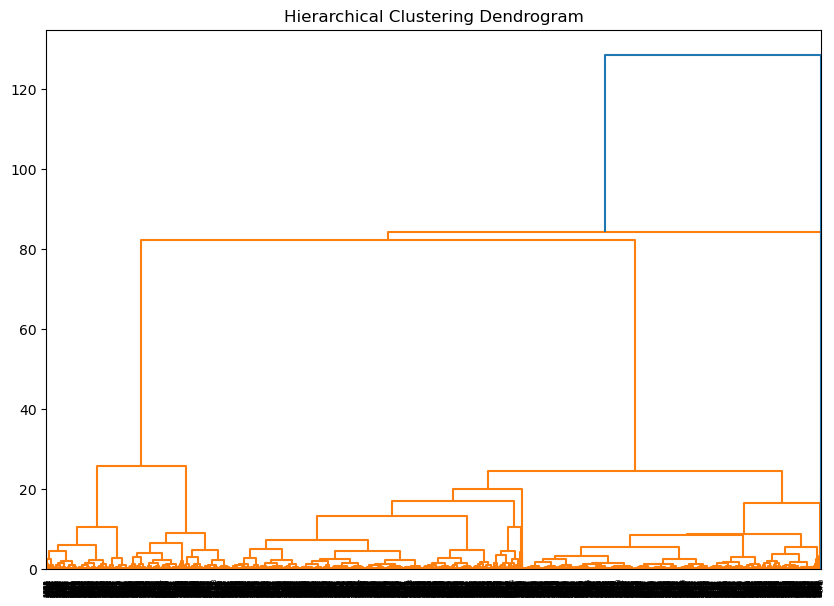

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linked = linkage(customer_df_reduced, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


from scipy.cluster.hierarchy import fcluster
clusters_hc = fcluster(linked, 5, criterion='maxclust')
customer_df['Cluster_HC'] = clusters_hc


In [16]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(customer_df_reduced)

customer_df['Cluster_DBSCAN'] = clusters_dbscan



In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(customer_df_reduced, method='ward')



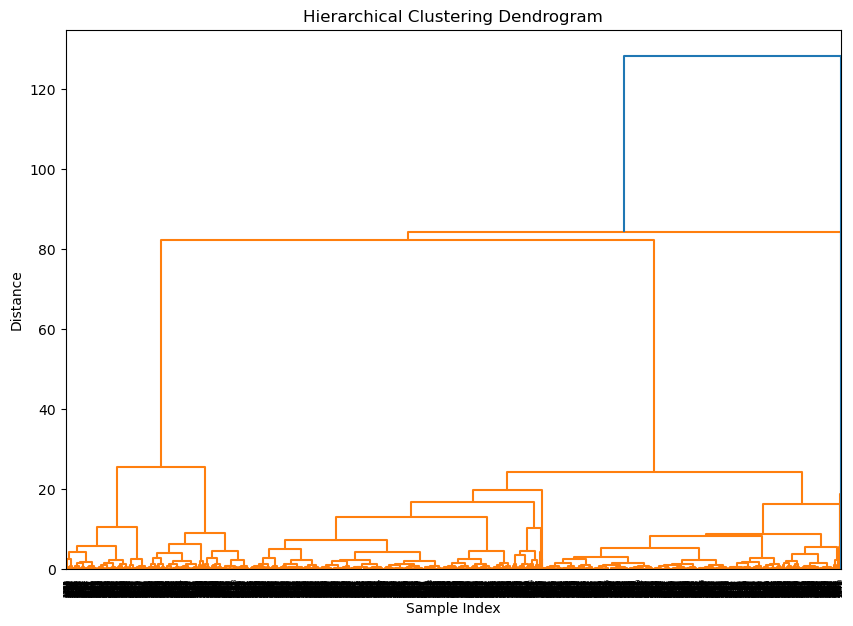

In [18]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


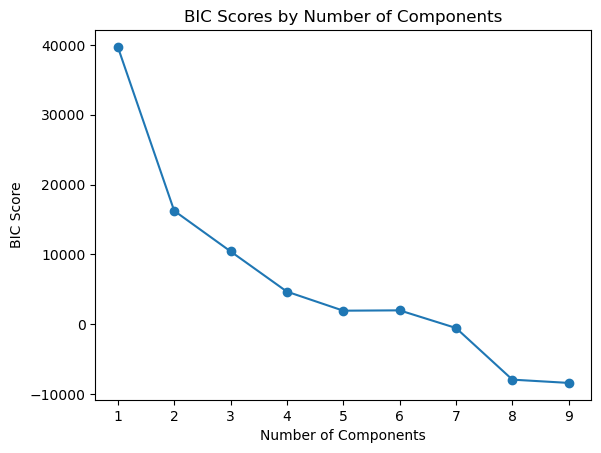

Optimal number of components: 9


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

n_components_range = range(1, 10)  
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(customer_df_reduced)
    bic_scores.append(gmm.bic(customer_df_reduced))

# Plot BIC scores
plt.plot(n_components_range, bic_scores, marker='o')
plt.title('BIC Scores by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.show()

optimal_n_components = n_components_range[np.argmin(bic_scores)]
print(f"Optimal number of components: {optimal_n_components}")


In [20]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=5)  # Adjust n_clusters based on your requirement
clusters_agglo = agglo.fit_predict(customer_df_reduced)

customer_df['Cluster_Agglo'] = clusters_agglo

# Evaluate with Silhouette Score
silhouette_agglo = silhouette_score(customer_df_reduced, clusters_agglo)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_agglo}")


Silhouette Score for Agglomerative Clustering: 0.5593730678468466


In [21]:
from sklearn.cluster import AffinityPropagation

affinity = AffinityPropagation(random_state=42)
clusters_affinity = affinity.fit_predict(customer_df_reduced)

customer_df['Cluster_Affinity'] = clusters_affinity

# Evaluate with Silhouette Score
silhouette_affinity = silhouette_score(customer_df_reduced, clusters_affinity)
print(f"Silhouette Score for Affinity Propagation: {silhouette_affinity}")


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Silhouette Score for Affinity Propagation: 0.2660988260276317


In [22]:
from sklearn.cluster import MeanShift

mean_shift = MeanShift()
clusters_mean_shift = mean_shift.fit_predict(customer_df_reduced)

customer_df['Cluster_MeanShift'] = clusters_mean_shift

# Evaluate with Silhouette Score
silhouette_mean_shift = silhouette_score(customer_df_reduced, clusters_mean_shift)
print(f"Silhouette Score for Mean Shift: {silhouette_mean_shift}")


Silhouette Score for Mean Shift: 0.3628306588808566


In [23]:
from scipy.cluster.hierarchy import fcluster


distance_threshold = 50  
clusters = fcluster(linked, distance_threshold, criterion='distance')

customer_df['Cluster_Labels'] = clusters


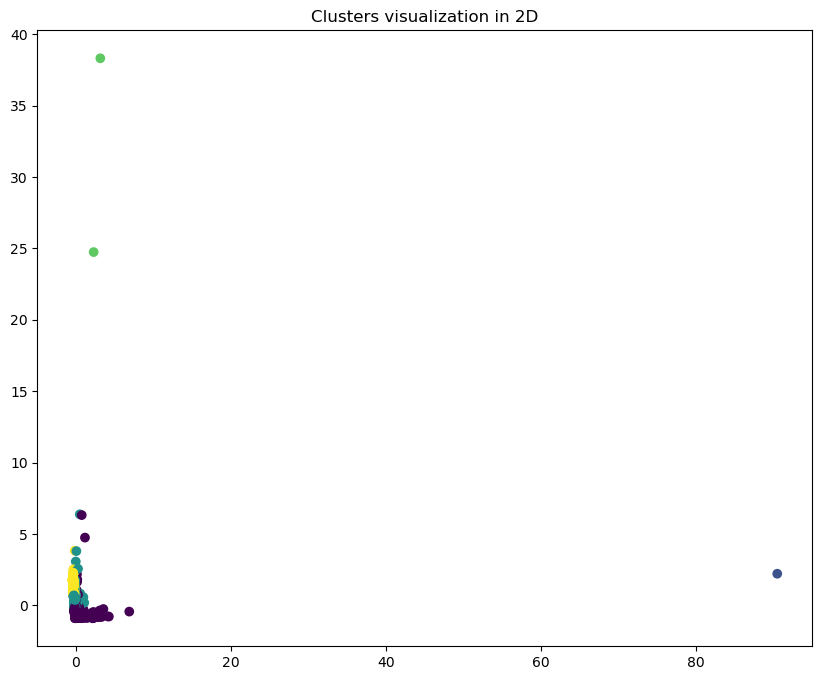

Silhouette Score for K-Means: 0.5357691983592681
Silhouette Score for Hierarchical Clustering: 0.5593730678468466


In [24]:
plt.figure(figsize=(10, 8))
plt.scatter(customer_df_reduced[:, 0], customer_df_reduced[:, 1], c=customer_df['Cluster'], cmap='viridis')
plt.title('Clusters visualization in 2D')
plt.show()

from sklearn.metrics import silhouette_score
silhouette_kmeans = silhouette_score(customer_df_reduced, customer_df['Cluster'])
silhouette_hc = silhouette_score(customer_df_reduced, customer_df['Cluster_HC'])

print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hc}")


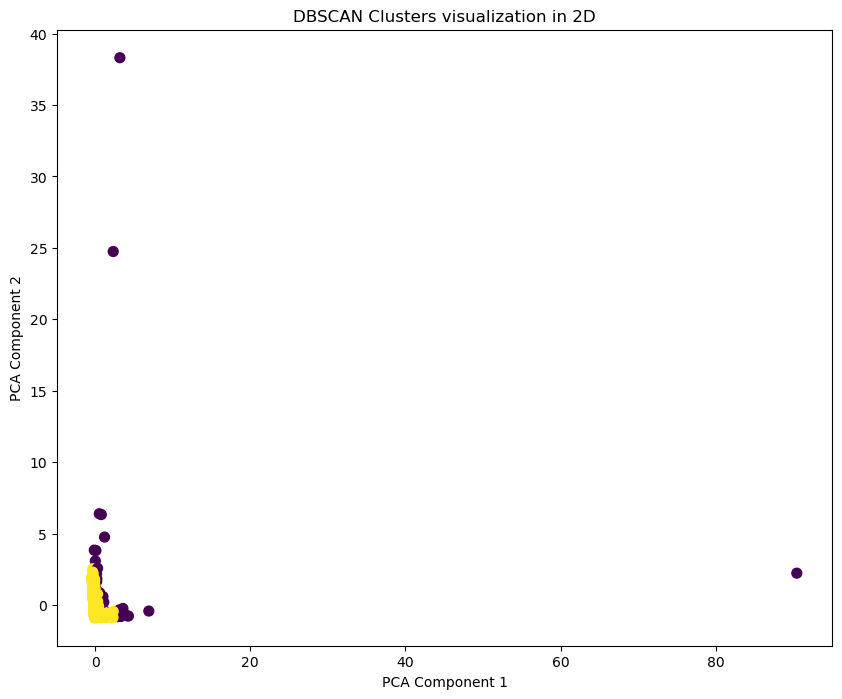

In [25]:
plt.figure(figsize=(10, 8))
plt.scatter(customer_df_reduced[:, 0], customer_df_reduced[:, 1], c=customer_df['Cluster_DBSCAN'], cmap='viridis', s=50)
plt.title('DBSCAN Clusters visualization in 2D')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


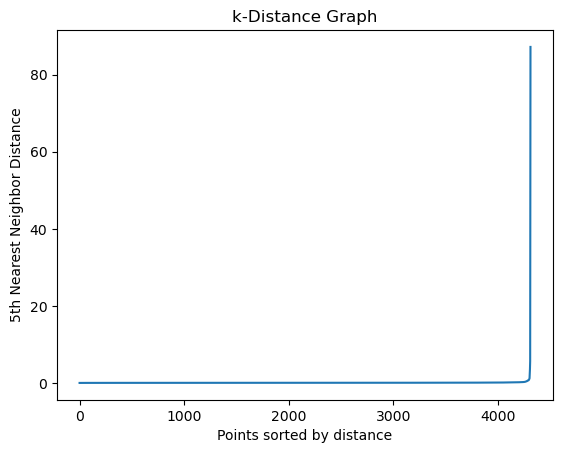

In [26]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(customer_df_reduced)
distances, indices = neighbors.kneighbors(customer_df_reduced)
distances = np.sort(distances[:, -1])

plt.plot(distances)
plt.title('k-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()




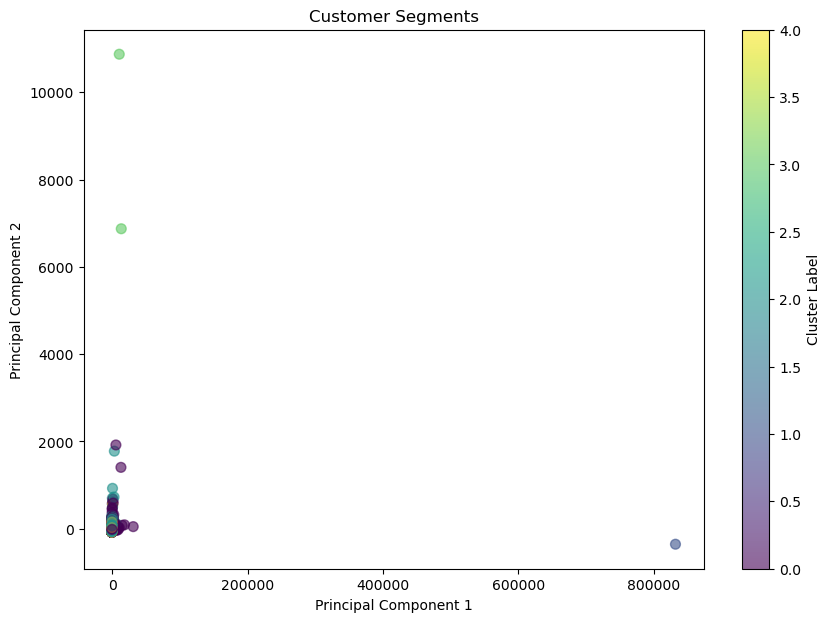

In [27]:
from sklearn.decomposition import PCA

# Reduce dimensions
pca = PCA(n_components=2)
customer_df_reduced = pca.fit_transform(customer_df.drop('Cluster', axis=1))

# Plot
plt.figure(figsize=(10, 7))
plt.scatter(customer_df_reduced[:, 0], customer_df_reduced[:, 1], c=customer_df['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segments')
plt.colorbar(label='Cluster Label')
plt.show()


In [28]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=4200, min_samples=5)  
clusters_dbscan = dbscan.fit_predict(customer_df_reduced)


customer_df['Cluster_DBSCAN'] = clusters_dbscan


n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_noise = list(clusters_dbscan).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")


if n_clusters > 1:
    silhouette_dbscan = silhouette_score(customer_df_reduced[clusters_dbscan != -1], clusters_dbscan[clusters_dbscan != -1])
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")
else:
    print("Not enough clusters for Silhouette Score.")


Estimated number of clusters: 1
Estimated number of noise points: 6
Not enough clusters for Silhouette Score.


In [30]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-Means
silhouette_kmeans = silhouette_score(customer_df_reduced, customer_df['Cluster'])
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")

# Calculate silhouette score for Hierarchical Clustering
silhouette_hc = silhouette_score(customer_df_reduced, customer_df['Cluster_HC'])
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hc}")

# DBSCAN: Check if there's more than one cluster (excluding noise) before calculating silhouette score
if len(set(customer_df['Cluster_DBSCAN']) - {-1}) > 1:
    silhouette_dbscan = silhouette_score(customer_df_reduced[customer_df['Cluster_DBSCAN'] != -1], customer_df['Cluster_DBSCAN'][customer_df['Cluster_DBSCAN'] != -1])
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")
else:
    print("DBSCAN did not form distinct clusters, so Silhouette Score is not applicable.")

# Calculate silhouette score for Agglomerative Clustering
silhouette_agglo = silhouette_score(customer_df_reduced, customer_df['Cluster_Agglo'])
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_agglo}")

# Calculate silhouette score for Affinity Propagation
silhouette_affinity = silhouette_score(customer_df_reduced, customer_df['Cluster_Affinity'])
print(f"Silhouette Score for Affinity Propagation: {silhouette_affinity}")

# Calculate silhouette score for Mean Shift
silhouette_mean_shift = silhouette_score(customer_df_reduced, customer_df['Cluster_MeanShift'])
print(f"Silhouette Score for Mean Shift: {silhouette_mean_shift}")


Silhouette Score for K-Means: -0.2938478757553061
Silhouette Score for Hierarchical Clustering: -0.3487854389390039
DBSCAN did not form distinct clusters, so Silhouette Score is not applicable.
Silhouette Score for Agglomerative Clustering: -0.3487854389390039
Silhouette Score for Affinity Propagation: -0.349421505753883
Silhouette Score for Mean Shift: -0.39095993700679654


Cluster centroids:
 [[ 5.96214051e-02 -4.19817641e-01  4.17095583e-01]
 [ 9.04366634e+01  2.22237165e+00 -6.70113265e+00]
 [-1.30476528e-01  4.22544693e-01 -4.60954280e-01]
 [ 2.75590700e+00  3.15263082e+01  2.77808531e+01]
 [-2.77311768e-01  1.37826682e+00 -1.50540898e+00]]


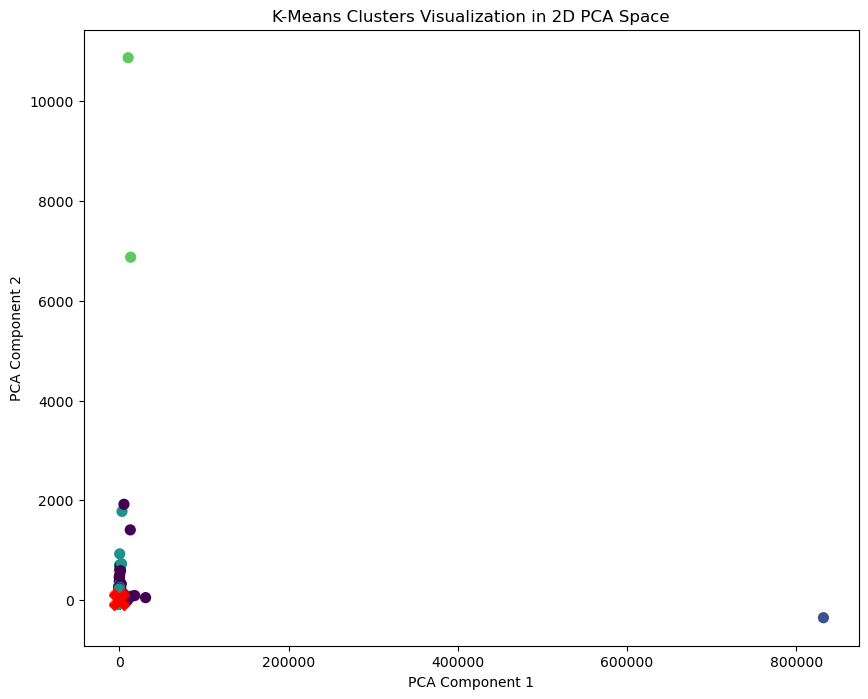


Cluster 0 characteristics:
         TotalSpend  PurchaseFrequency      Recency  AverageBasketValue
count   2904.000000        2904.000000  2904.000000         2904.000000
mean     388.429421           5.625689  4891.459366           72.902425
std      972.897315           9.608709    25.025218           74.514992
min        0.420000           1.000000  4858.000000            0.320000
25%       81.400000           2.000000  4870.000000           32.890500
50%      195.100000           3.000000  4886.000000           59.286250
75%      434.902500           6.000000  4911.000000           92.220417
max    31567.340000         205.000000  4951.000000         2000.496667

Cluster 1 characteristics:
       TotalSpend  PurchaseFrequency  Recency  AverageBasketValue
count         1.0                1.0      1.0            1.000000
mean     832442.7             1739.0   4859.0          478.690454
std           NaN                NaN      NaN                 NaN
min      832442.7             17

In [31]:
# Cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster centroids:\n", centroids)

# Visualize clusters in 2D using the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(customer_df_reduced[:, 0], customer_df_reduced[:, 1], c=customer_df['Cluster'], cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5, marker='X')  # Mark centroids
plt.title('K-Means Clusters Visualization in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Characterize clusters by key features
for i in range(kmeans.n_clusters):
    cluster_members = customer_df[customer_df['Cluster'] == i]
    print(f"\nCluster {i} characteristics:")
    print(cluster_members[numeric_cols].describe())  # Summary statistics for numerical features in each cluster


Cluster 0
Size: Large (2904 members)
Total Spend: Moderate average spend, with a wide range, indicating a mix of spending behaviors.
Purchase Frequency: Moderate, suggesting occasional to regular purchasers.
Recency: A wider range in recency, with some customers not having purchased recently.
Average Basket Value: Varied, with some high-value purchases.
This cluster might represent a "General" segment with a broad mix of behaviors but leaning towards moderate spend and frequency.

Cluster 1
Size: Very small (1 member)
Total Spend: Extremely high, suggesting this might be an outlier or a very high-value customer.
Purchase Frequency: Extremely high, indicating frequent transactions.
Recency: Purchased very recently.
Average Basket Value: High.
Given its size, this cluster could be an "Outlier" or "High-Value" segment, possibly representing bulk purchases or institutional buying.

Cluster 2
Size: Medium (815 members)
Total Spend: Lower average spend, indicating smaller transactions.
Purchase Frequency: Lower, suggesting less frequent purchases.
Recency: More recent purchases.
Average Basket Value: Moderate, with some higher-value baskets.
This cluster might be "Occasional Shoppers" with recent, less frequent, and smaller transactions.

Cluster 3
Size: Very small (2 members)
Total Spend: High, likely indicating significant transactions.
Purchase Frequency: Very low, suggesting one-off or rare purchases.
Recency: Least recent purchasers.
Average Basket Value: Extremely high, suggesting premium or bulk purchases.
Like Cluster 1, this is likely an "Outlier" or "Premium" segment, possibly representing large, infrequent transactions.

Cluster 4
Size: Medium (591 members)
Total Spend: Low, indicating smaller transaction sizes.
Purchase Frequency: Low, suggesting infrequent purchases.
Recency: Least recent, indicating a lapse since the last purchase.
Average Basket Value: Relatively low, consistent with smaller, infrequent transactions.

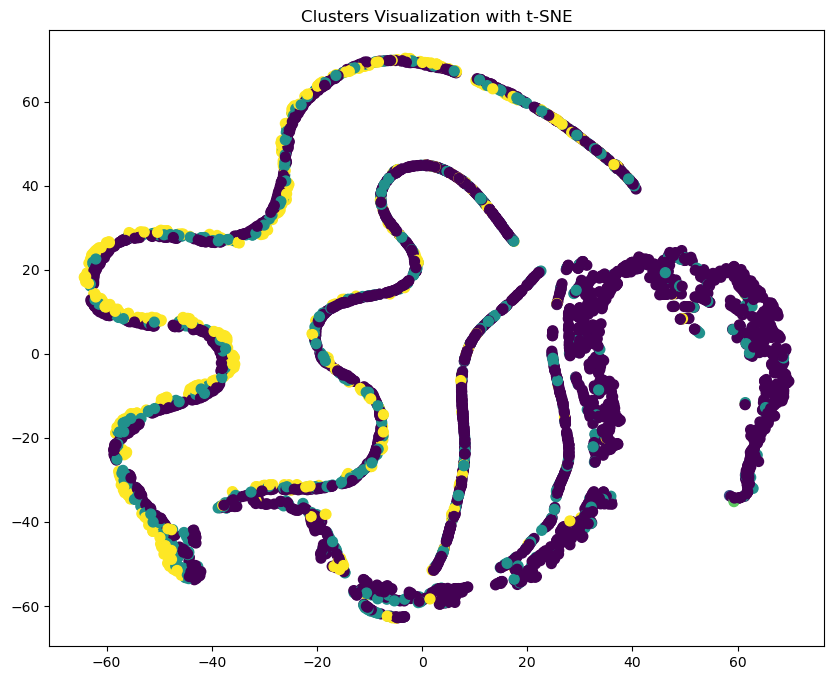

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
customer_df_tsne = tsne.fit_transform(customer_df_reduced)

plt.figure(figsize=(10, 8))
plt.scatter(customer_df_tsne[:, 0], customer_df_tsne[:, 1], c=customer_df['Cluster'], cmap='viridis', s=50)
plt.title('Clusters Visualization with t-SNE')
plt.show()


In [33]:
# Profiling each cluster
for i in range(kmeans.n_clusters):
    cluster_members = customer_df[customer_df['Cluster'] == i]
    print(f"\nProfile for Cluster {i}:")
    display(cluster_members.describe())  # Summary statistics for numerical features in each cluster



Profile for Cluster 0:


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue,Cluster,Cluster_HC,Cluster_DBSCAN,Cluster_Agglo,Cluster_Affinity,Cluster_MeanShift,Cluster_Labels
count,2904.000000,2904.000000,2904.000000,2904.000000,2904.0,2904.0,2904.000000,2904.0,2904.000000,2904.000000,2904.0
mean,388.429421,5.625689,4891.459366,72.902425,0.0,2.0,-0.001033,0.0,48.430785,0.029614,2.0
std,972.897315,9.608709,25.025218,74.514992,0.0,0.0,0.032130,0.0,24.897766,0.315766,0.0
min,0.420000,1.000000,4858.000000,0.320000,0.0,2.0,-1.000000,0.0,1.000000,0.000000,2.0
25%,81.400000,2.000000,4870.000000,32.890500,0.0,2.0,0.000000,0.0,26.000000,0.000000,2.0
50%,195.100000,3.000000,4886.000000,59.286250,0.0,2.0,0.000000,0.0,52.000000,0.000000,2.0
75%,434.902500,6.000000,4911.000000,92.220417,0.0,2.0,0.000000,0.0,70.000000,0.000000,2.0
max,31567.340000,205.000000,4951.000000,2000.496667,0.0,2.0,0.000000,0.0,84.000000,9.000000,2.0



Profile for Cluster 1:


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue,Cluster,Cluster_HC,Cluster_DBSCAN,Cluster_Agglo,Cluster_Affinity,Cluster_MeanShift,Cluster_Labels
count,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,832442.7,1739.0,4859.0,478.690454,1.0,5.0,-1.0,3.0,0.0,4.0,4.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,832442.7,1739.0,4859.0,478.690454,1.0,5.0,-1.0,3.0,0.0,4.0,4.0
25%,832442.7,1739.0,4859.0,478.690454,1.0,5.0,-1.0,3.0,0.0,4.0,4.0
50%,832442.7,1739.0,4859.0,478.690454,1.0,5.0,-1.0,3.0,0.0,4.0,4.0
75%,832442.7,1739.0,4859.0,478.690454,1.0,5.0,-1.0,3.0,0.0,4.0,4.0
max,832442.7,1739.0,4859.0,478.690454,1.0,5.0,-1.0,3.0,0.0,4.0,4.0



Profile for Cluster 2:


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue,Cluster,Cluster_HC,Cluster_DBSCAN,Cluster_Agglo,Cluster_Affinity,Cluster_MeanShift,Cluster_Labels
count,815.000000,815.00000,815.000000,815.000000,815.0,815.000000,815.0,815.000000,815.000000,815.000000,815.000000
mean,172.308589,2.48589,5009.907975,70.136431,2.0,2.528834,0.0,2.115337,40.434356,0.376687,2.528834
std,352.705029,2.85471,38.583680,100.512575,0.0,0.499474,0.0,1.997898,22.225012,2.154179,0.499474
min,0.190000,1.00000,4950.000000,0.190000,2.0,2.000000,0.0,0.000000,5.000000,0.000000,2.000000
25%,40.975000,1.00000,4973.000000,24.422500,2.0,2.000000,0.0,0.000000,17.000000,0.000000,2.000000
50%,87.750000,2.00000,5008.000000,48.550000,2.0,3.000000,0.0,4.000000,42.000000,0.000000,3.000000
75%,183.395000,3.00000,5043.000000,87.135000,2.0,3.000000,0.0,4.000000,54.000000,0.000000,3.000000
max,6275.450000,46.00000,5078.000000,1855.250000,2.0,3.000000,0.0,4.000000,85.000000,13.000000,3.000000



Profile for Cluster 3:


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue,Cluster,Cluster_HC,Cluster_DBSCAN,Cluster_Agglo,Cluster_Affinity,Cluster_MeanShift,Cluster_Labels
count,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.0,2.0,2.000000,2.000000,2.0
mean,12434.920000,1.500000,5122.000000,8955.835000,3.0,1.0,-1.0,2.0,36.500000,6.500000,1.0
std,2095.044256,0.707107,2.828427,2825.124936,0.0,0.0,0.0,0.0,34.648232,0.707107,0.0
min,10953.500000,1.000000,5120.000000,6958.170000,3.0,1.0,-1.0,2.0,12.000000,6.000000,1.0
25%,11694.210000,1.250000,5121.000000,7957.002500,3.0,1.0,-1.0,2.0,24.250000,6.250000,1.0
50%,12434.920000,1.500000,5122.000000,8955.835000,3.0,1.0,-1.0,2.0,36.500000,6.500000,1.0
75%,13175.630000,1.750000,5123.000000,9954.667500,3.0,1.0,-1.0,2.0,48.750000,6.750000,1.0
max,13916.340000,2.000000,5124.000000,10953.500000,3.0,1.0,-1.0,2.0,61.000000,7.000000,1.0



Profile for Cluster 4:


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue,Cluster,Cluster_HC,Cluster_DBSCAN,Cluster_Agglo,Cluster_Affinity,Cluster_MeanShift,Cluster_Labels
count,591.000000,591.000000,591.000000,591.000000,591.0,591.000000,591.0,591.000000,591.000000,591.000000,591.000000
mean,84.134355,1.433164,5148.150592,61.011073,4.0,3.763113,0.0,1.698816,43.416244,5.776650,2.998308
std,100.441825,0.969982,46.696162,56.635770,0.0,0.429497,0.0,1.271852,26.083361,6.804848,0.041135
min,0.250000,1.000000,5080.000000,0.250000,4.0,2.000000,0.0,0.000000,6.000000,0.000000,2.000000
25%,27.805000,1.000000,5111.000000,22.945000,4.0,4.000000,0.0,1.000000,21.000000,0.000000,3.000000
50%,56.290000,1.000000,5140.000000,45.910000,4.0,4.000000,0.0,1.000000,37.000000,0.000000,3.000000
75%,108.205000,1.000000,5178.000000,84.255000,4.0,4.000000,0.0,1.000000,67.000000,14.000000,3.000000
max,1248.130000,8.000000,5232.000000,624.065000,4.0,4.000000,0.0,4.000000,83.000000,14.000000,3.000000


In [34]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Davies-Bouldin Index
db_index = davies_bouldin_score(customer_df_reduced, customer_df['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(customer_df_reduced, customer_df['Cluster'])
print(f"Calinski-Harabasz Index: {ch_index}")


Davies-Bouldin Index: 1.6217251288936723
Calinski-Harabasz Index: 257852.74343792448


In [35]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(customer_df_reduced):
    # Split data
    X_train, X_test = customer_df_reduced[train_index], customer_df_reduced[test_index]
    
    kmeans_cv = KMeans(n_clusters=5, random_state=42)
    kmeans_cv.fit(X_train)
    
    test_clusters = kmeans_cv.predict(X_test)
    
    silhouette_cv = silhouette_score(X_test, test_clusters)
    print(f"Silhouette Score on test split: {silhouette_cv}")


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score on test split: 0.7973337439715389


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score on test split: 0.7713567750281765


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score on test split: 0.7689431368012178


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score on test split: 0.8204891809943651


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score on test split: 0.6956281628363002



--- Profile for Cluster 0 ---


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue
count,2904.00,2904.00,2904.00,2904.00
mean,388.43,5.63,4891.46,72.90
std,972.90,9.61,25.03,74.51
min,0.42,1.00,4858.00,0.32
25%,81.40,2.00,4870.00,32.89
50%,195.10,3.00,4886.00,59.29
75%,434.90,6.00,4911.00,92.22
max,31567.34,205.00,4951.00,2000.50


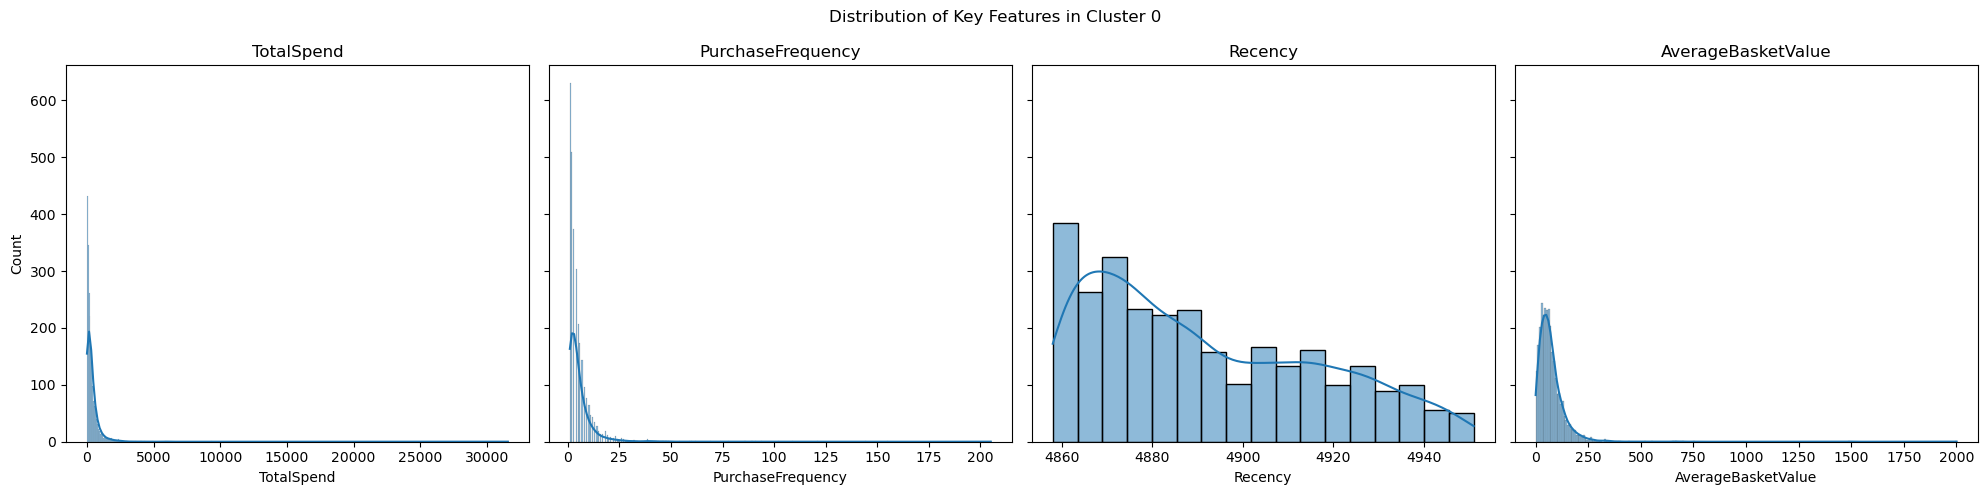


--- Profile for Cluster 1 ---


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue
count,1.0,1.0,1.0,1.00
mean,832442.7,1739.0,4859.0,478.69
std,NaN,NaN,NaN,NaN
min,832442.7,1739.0,4859.0,478.69
25%,832442.7,1739.0,4859.0,478.69
50%,832442.7,1739.0,4859.0,478.69
75%,832442.7,1739.0,4859.0,478.69
max,832442.7,1739.0,4859.0,478.69


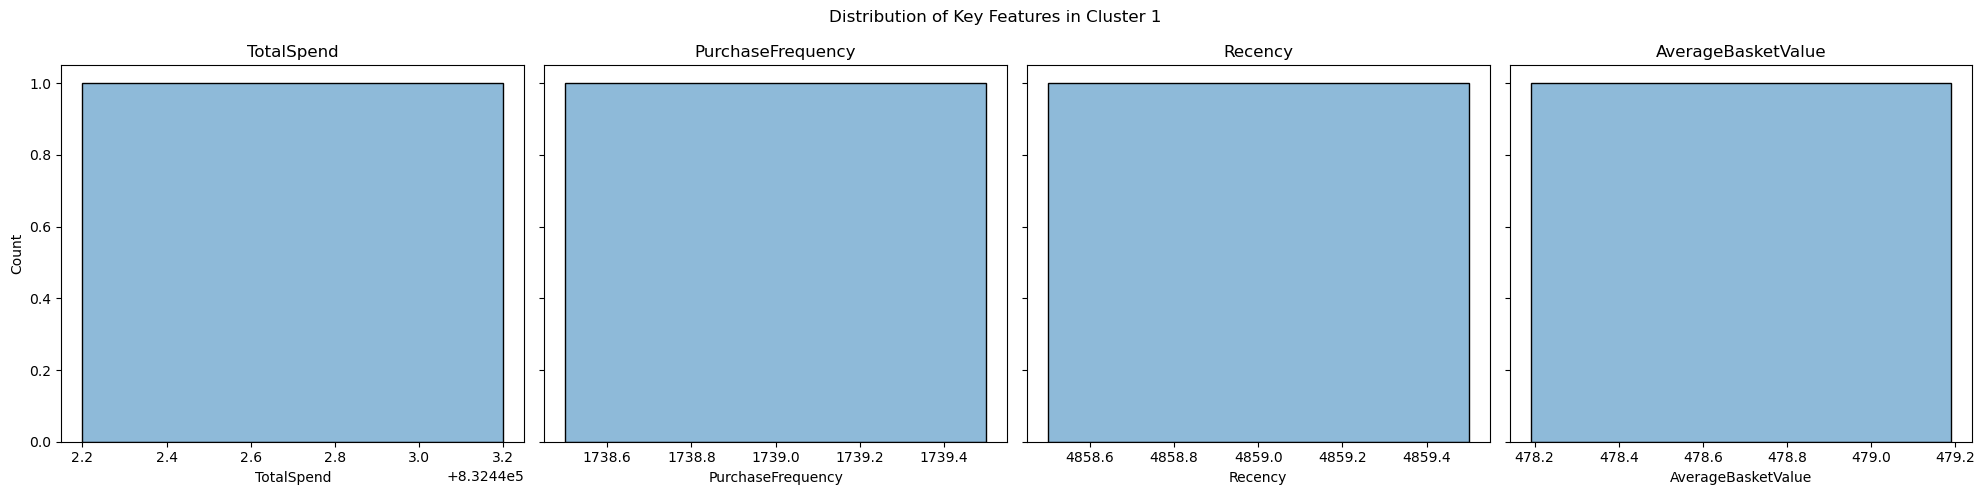


--- Profile for Cluster 2 ---


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue
count,815.00,815.00,815.00,815.00
mean,172.31,2.49,5009.91,70.14
std,352.71,2.85,38.58,100.51
min,0.19,1.00,4950.00,0.19
25%,40.98,1.00,4973.00,24.42
50%,87.75,2.00,5008.00,48.55
75%,183.40,3.00,5043.00,87.14
max,6275.45,46.00,5078.00,1855.25


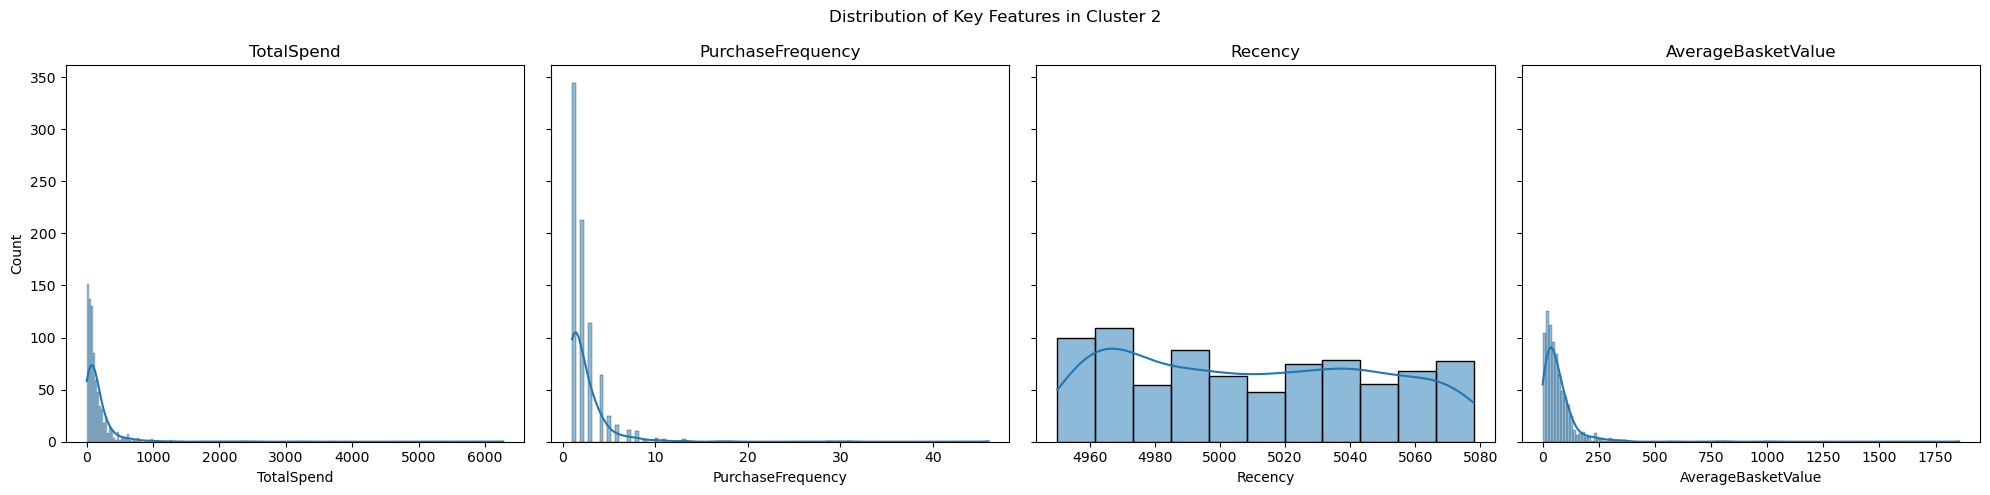


--- Profile for Cluster 3 ---


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue
count,2.00,2.00,2.00,2.00
mean,12434.92,1.50,5122.00,8955.83
std,2095.04,0.71,2.83,2825.12
min,10953.50,1.00,5120.00,6958.17
25%,11694.21,1.25,5121.00,7957.00
50%,12434.92,1.50,5122.00,8955.83
75%,13175.63,1.75,5123.00,9954.67
max,13916.34,2.00,5124.00,10953.50


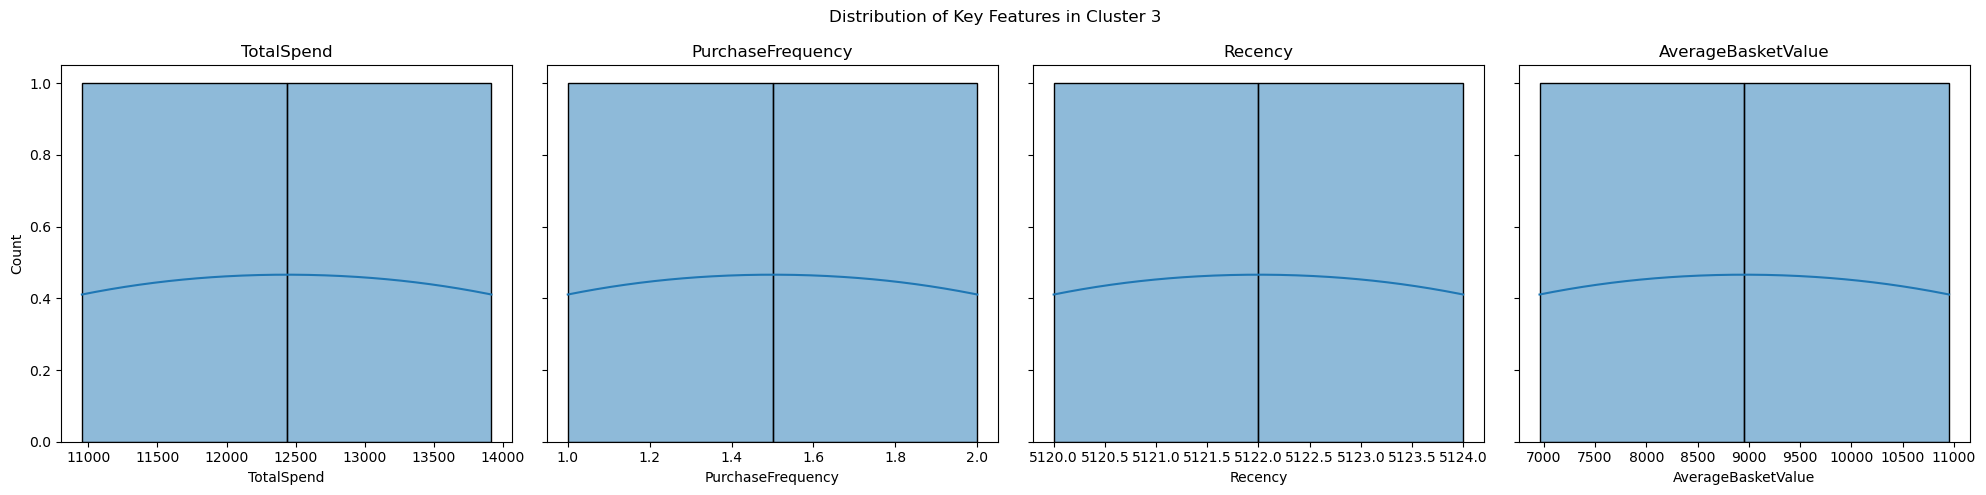


--- Profile for Cluster 4 ---


,TotalSpend,PurchaseFrequency,Recency,AverageBasketValue
count,591.00,591.00,591.00,591.00
mean,84.13,1.43,5148.15,61.01
std,100.44,0.97,46.70,56.64
min,0.25,1.00,5080.00,0.25
25%,27.80,1.00,5111.00,22.94
50%,56.29,1.00,5140.00,45.91
75%,108.20,1.00,5178.00,84.26
max,1248.13,8.00,5232.00,624.06


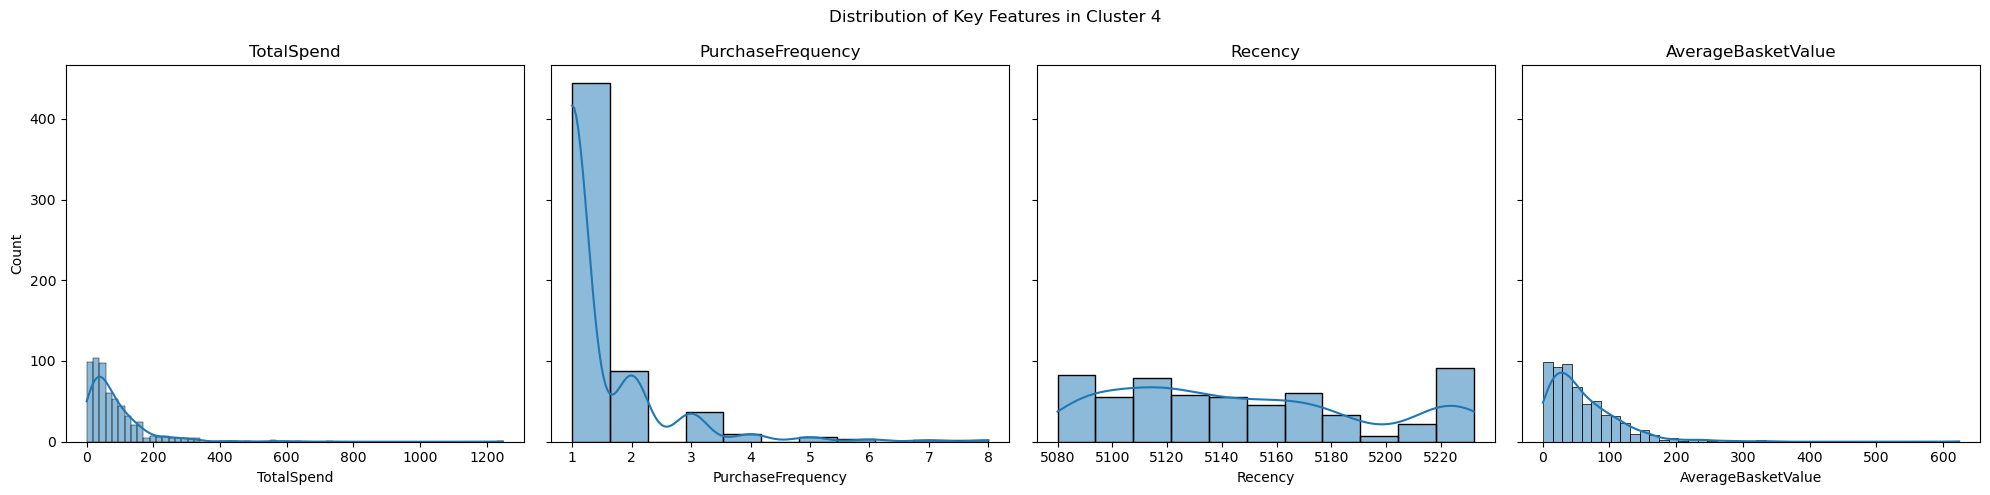

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

key_features = ['TotalSpend', 'PurchaseFrequency', 'Recency', 'AverageBasketValue']

for i in range(customer_df['Cluster'].nunique()):
    print(f"\n--- Profile for Cluster {i} ---")
    cluster_data = customer_df[customer_df['Cluster'] == i]

    display(cluster_data[key_features].describe().round(2))
    
    fig, axes = plt.subplots(1, len(key_features), figsize=(20, 5), sharey=True)
    fig.suptitle(f'Distribution of Key Features in Cluster {i}')

    for ax, feature in zip(axes, key_features):
        sns.histplot(cluster_data[feature], kde=True, ax=ax)
        ax.set_title(feature)

    plt.tight_layout()
    plt.show()


In [37]:
print(customer_df.columns)


Index(['TotalSpend', 'PurchaseFrequency', 'Recency', 'AverageBasketValue',
       'Cluster', 'Cluster_HC', 'Cluster_DBSCAN', 'Cluster_Agglo',
       'Cluster_Affinity', 'Cluster_MeanShift', 'Cluster_Labels'],
      dtype='object')


In [38]:
n_clusters = customer_df['Cluster'].nunique()

for i in range(n_clusters):
    cluster_data = customer_df[customer_df['Cluster'] == i]
    
    average_spend = cluster_data['TotalSpend'].mean()
    average_frequency = cluster_data['PurchaseFrequency'].mean()
    average_recency = cluster_data['Recency'].mean()
    average_basket_value = cluster_data['AverageBasketValue'].mean()

    print(f"\n--- Cluster {i} Insights ---")
    print(f"Average Spend: {average_spend:.2f}")
    print(f"Average Purchase Frequency: {average_frequency:.2f}")
    print(f"Average Recency: {average_recency:.2f} days ago")
    print(f"Average Basket Value: {average_basket_value:.2f}")

   
    if average_spend > customer_df['TotalSpend'].quantile(0.75):
        print("Action: Consider premium offers or loyalty programs for high spenders.")
    elif average_frequency > customer_df['PurchaseFrequency'].quantile(0.75):
        print("Action: Reward frequent shoppers with a loyalty program or exclusive deals.")
    elif average_recency > customer_df['Recency'].quantile(0.75):
        print("Action: Re-engage customers who haven't shopped recently with a 'We Miss You' campaign.")
    else:
        print("Action: Engage with standard promotions and aim to increase the basket value.")



--- Cluster 0 Insights ---
Average Spend: 388.43
Average Purchase Frequency: 5.63
Average Recency: 4891.46 days ago
Average Basket Value: 72.90
Action: Consider premium offers or loyalty programs for high spenders.

--- Cluster 1 Insights ---
Average Spend: 832442.70
Average Purchase Frequency: 1739.00
Average Recency: 4859.00 days ago
Average Basket Value: 478.69
Action: Consider premium offers or loyalty programs for high spenders.

--- Cluster 2 Insights ---
Average Spend: 172.31
Average Purchase Frequency: 2.49
Average Recency: 5009.91 days ago
Average Basket Value: 70.14
Action: Re-engage customers who haven't shopped recently with a 'We Miss You' campaign.

--- Cluster 3 Insights ---
Average Spend: 12434.92
Average Purchase Frequency: 1.50
Average Recency: 5122.00 days ago
Average Basket Value: 8955.83
Action: Consider premium offers or loyalty programs for high spenders.

--- Cluster 4 Insights ---
Average Spend: 84.13
Average Purchase Frequency: 1.43
Average Recency: 5148.15 d

In [39]:
cluster_0 = customer_df[customer_df['Cluster'] == 0]

print("General Shopper Characteristics:")
print(cluster_0[['TotalSpend', 'PurchaseFrequency', 'Recency', 'AverageBasketValue']].describe())


high_spend_customers = cluster_0[cluster_0['TotalSpend'] > cluster_0['TotalSpend'].quantile(0.75)]
print(f"\nNumber of High Spend Customers in Cluster 0: {len(high_spend_customers)}")




General Shopper Characteristics:
         TotalSpend  PurchaseFrequency      Recency  AverageBasketValue
count   2904.000000        2904.000000  2904.000000         2904.000000
mean     388.429421           5.625689  4891.459366           72.902425
std      972.897315           9.608709    25.025218           74.514992
min        0.420000           1.000000  4858.000000            0.320000
25%       81.400000           2.000000  4870.000000           32.890500
50%      195.100000           3.000000  4886.000000           59.286250
75%      434.902500           6.000000  4911.000000           92.220417
max    31567.340000         205.000000  4951.000000         2000.496667

Number of High Spend Customers in Cluster 0: 726


In [40]:
# Filter Cluster 1
cluster_1 = customer_df[customer_df['Cluster'] == 1]

# Analyze Cluster 1
print("Occasional Shopper Characteristics:")
print(cluster_1[['TotalSpend', 'PurchaseFrequency', 'Recency', 'AverageBasketValue']].describe())



Occasional Shopper Characteristics:
       TotalSpend  PurchaseFrequency  Recency  AverageBasketValue
count         1.0                1.0      1.0            1.000000
mean     832442.7             1739.0   4859.0          478.690454
std           NaN                NaN      NaN                 NaN
min      832442.7             1739.0   4859.0          478.690454
25%      832442.7             1739.0   4859.0          478.690454
50%      832442.7             1739.0   4859.0          478.690454
75%      832442.7             1739.0   4859.0          478.690454
max      832442.7             1739.0   4859.0          478.690454


In [41]:
# Filter Cluster 2
cluster_2 = customer_df[customer_df['Cluster'] == 2]

# Analyze Cluster 2
print("High Roller Characteristics:")
print(cluster_2[['TotalSpend', 'PurchaseFrequency', 'Recency', 'AverageBasketValue']].describe())




High Roller Characteristics:
        TotalSpend  PurchaseFrequency      Recency  AverageBasketValue
count   815.000000          815.00000   815.000000          815.000000
mean    172.308589            2.48589  5009.907975           70.136431
std     352.705029            2.85471    38.583680          100.512575
min       0.190000            1.00000  4950.000000            0.190000
25%      40.975000            1.00000  4973.000000           24.422500
50%      87.750000            2.00000  5008.000000           48.550000
75%     183.395000            3.00000  5043.000000           87.135000
max    6275.450000           46.00000  5078.000000         1855.250000


In [42]:
# Filter Cluster 3
cluster_3 = customer_df[customer_df['Cluster'] == 3]

# Analyze Cluster 3
print("Bulk Buyer Characteristics:")
print(cluster_3[['TotalSpend', 'PurchaseFrequency', 'Recency', 'AverageBasketValue']].describe())




Bulk Buyer Characteristics:
         TotalSpend  PurchaseFrequency      Recency  AverageBasketValue
count      2.000000           2.000000     2.000000            2.000000
mean   12434.920000           1.500000  5122.000000         8955.835000
std     2095.044256           0.707107     2.828427         2825.124936
min    10953.500000           1.000000  5120.000000         6958.170000
25%    11694.210000           1.250000  5121.000000         7957.002500
50%    12434.920000           1.500000  5122.000000         8955.835000
75%    13175.630000           1.750000  5123.000000         9954.667500
max    13916.340000           2.000000  5124.000000        10953.500000


In [43]:
# Filter Cluster 4
cluster_4 = customer_df[customer_df['Cluster'] == 4]

# Analyze Cluster 4
print("Infrequent Shopper Characteristics:")
print(cluster_4[['TotalSpend', 'PurchaseFrequency', 'Recency', 'AverageBasketValue']].describe())




Infrequent Shopper Characteristics:
        TotalSpend  PurchaseFrequency      Recency  AverageBasketValue
count   591.000000         591.000000   591.000000          591.000000
mean     84.134355           1.433164  5148.150592           61.011073
std     100.441825           0.969982    46.696162           56.635770
min       0.250000           1.000000  5080.000000            0.250000
25%      27.805000           1.000000  5111.000000           22.945000
50%      56.290000           1.000000  5140.000000           45.910000
75%     108.205000           1.000000  5178.000000           84.255000
max    1248.130000           8.000000  5232.000000          624.065000


Market Basket Analysis

In [44]:
!pip install mlxtend

In [45]:
!pip install openpyxl

In [46]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules



In [47]:
df2 = pd.read_excel('data (2).xlsx')


In [48]:
print(df2.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [49]:
# Step 1: Create a list of transactions with all items converted to strings
transactions_str = df2.groupby('Invoice')['Description'].apply(lambda items: [str(item) for item in items]).tolist()

# Step 2: Apply TransactionEncoder to the transactions
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions_str).transform(transactions_str)

# Step 3: Convert the encoded array back into a DataFrame
one_hot_df = pd.DataFrame(te_ary, columns=te.columns_)



In [50]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(one_hot_df, min_support=0.01, use_colnames=True)


In [51]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                                           antecedents  \
0                        (60 TEATIME FAIRY CAKE CASES)   
1                     (72 SWEETHEART FAIRY CAKE CASES)   
2                        (60 TEATIME FAIRY CAKE CASES)   
3                     (PACK OF 60 DINOSAUR CAKE CASES)   
4                        (60 TEATIME FAIRY CAKE CASES)   
..                                                 ...   
299  (WOODEN PICTURE FRAME WHITE FINISH, WHITE HANG...   
300  (WOODEN FRAME ANTIQUE WHITE , WHITE HANGING HE...   
301                (WOODEN PICTURE FRAME WHITE FINISH)   
302                      (WOODEN FRAME ANTIQUE WHITE )   
303               (WHITE HANGING HEART T-LIGHT HOLDER)   

                                           consequents   support  confidence  \
0                     (72 SWEETHEART FAIRY CAKE CASES)  0.016414    0.352459   
1                        (60 TEATIME FAIRY CAKE CASES)  0.016414    0.541190   
2                     (PACK OF 60 DINOSAUR CAKE CASES)  0.01457

In [52]:
# Step 4: Perform Market Basket Analysis using Apriori algorithm
from mlxtend.frequent_patterns import apriori

# Set minimum support threshold
min_support = 0.05

# Generate frequent itemsets
frequent_itemsets = apriori(one_hot_df, min_support=min_support, use_colnames=True)

# Display frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Step 5: Generate association rules
from mlxtend.frequent_patterns import association_rules

# Set minimum threshold for confidence and lift
min_confidence = 0.5
min_lift = 1.2

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Filter rules based on lift
rules = rules[rules['lift'] > min_lift]

# Display association rules
print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
    support                              itemsets
0  0.075861            (REGENCY CAKESTAND 3 TIER)
1  0.061320      (STRAWBERRY CERAMIC TRINKET BOX)
2  0.118302  (WHITE HANGING HEART T-LIGHT HOLDER)
3  0.101610                                 (nan)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [53]:
min_support = 0.03  # Lowered from 0.05
frequent_itemsets = apriori(one_hot_df, min_support=min_support, use_colnames=True)


In [54]:
min_confidence = 0.2  # Lowered from 0.5
min_lift = 1.0  # Lowered from 1.2
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
rules = rules[rules['lift'] > min_lift]


In [55]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


In [56]:
# Generate frequent itemsets
frequent_itemsets = apriori(one_hot_df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


In [57]:
# Display rules and their metrics
pd.set_option('display.max_colwidth', None)  # To ensure all data is displayed
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                                                                 antecedents  \
0                                              (60 TEATIME FAIRY CAKE CASES)   
1                                           (72 SWEETHEART FAIRY CAKE CASES)   
2                                              (60 TEATIME FAIRY CAKE CASES)   
3                                           (PACK OF 60 DINOSAUR CAKE CASES)   
4                                              (60 TEATIME FAIRY CAKE CASES)   
..                                                                       ...   
299  (WOODEN PICTURE FRAME WHITE FINISH, WHITE HANGING HEART T-LIGHT HOLDER)   
300        (WOODEN FRAME ANTIQUE WHITE , WHITE HANGING HEART T-LIGHT HOLDER)   
301                                      (WOODEN PICTURE FRAME WHITE FINISH)   
302                                            (WOODEN FRAME ANTIQUE WHITE )   
303                                     (WHITE HANGING HEART T-LIGHT HOLDER)   

                                       

In [58]:
# Filter for high confidence and lift
high_value_rules = rules[(rules['confidence'] > 0.5) & (rules['lift'] > 1.2)]

# Display high-value rules
print(high_value_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                                                                 antecedents  \
1                                           (72 SWEETHEART FAIRY CAKE CASES)   
3                                           (PACK OF 60 DINOSAUR CAKE CASES)   
5                                       (PACK OF 60 PINK PAISLEY CAKE CASES)   
7                                           (PACK OF 60 SPACEBOY CAKE CASES)   
28                                                      (KITCHEN METAL SIGN)   
30                                                     (BATHROOM METAL SIGN)   
31                                                       (TOILET METAL SIGN)   
32                                      (PINK 3 PIECE MINI DOTS CUTLERY SET)   
33                                      (BLUE 3 PIECE MINI DOTS CUTLERY SET)   
34                                       (RED 3 PIECE MINI DOTS CUTLERY SET)   
35                                      (BLUE 3 PIECE MINI DOTS CUTLERY SET)   
37                                      

In [59]:
# Example: Analyze the first rule in detail
rule = high_value_rules.iloc[0]
antecedents = rule['antecedents']
consequents = rule['consequents']
print(f"Antecedents: {antecedents}")
print(f"Consequents: {consequents}")
print(f"Support: {rule['support']}")
print(f"Confidence: {rule['confidence']}")
print(f"Lift: {rule['lift']}")


Antecedents: frozenset({'72 SWEETHEART FAIRY CAKE CASES'})
Consequents: frozenset({'60 TEATIME FAIRY CAKE CASES'})
Support: 0.016414491948917267
Confidence: 0.5411899313501144
Lift: 11.62066249015268


In [60]:
from IPython.display import display
display(high_value_rules)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(72 SWEETHEART FAIRY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.030330,0.046571,0.016414,0.541190,11.620662,0.015002,2.078046,0.942534
3,(PACK OF 60 DINOSAUR CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.024847,0.046571,0.014575,0.586592,12.595559,0.013418,2.306267,0.944064
5,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.040255,0.046571,0.020648,0.512931,11.013875,0.018774,1.957482,0.947341
7,(PACK OF 60 SPACEBOY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.020787,0.046571,0.010515,0.505843,10.861680,0.009547,1.929405,0.927207
28,(KITCHEN METAL SIGN),(BATHROOM METAL SIGN),0.014263,0.025541,0.010307,0.722628,28.292447,0.009942,3.513180,0.978613
30,(BATHROOM METAL SIGN),(TOILET METAL SIGN),0.025541,0.018219,0.013257,0.519022,28.487867,0.012791,2.041217,0.990188
31,(TOILET METAL SIGN),(BATHROOM METAL SIGN),0.018219,0.025541,0.013257,0.727619,28.487867,0.012791,3.577558,0.982803
32,(PINK 3 PIECE MINI DOTS CUTLERY SET),(BLUE 3 PIECE MINI DOTS CUTLERY SET),0.015720,0.016831,0.010411,0.662252,39.347307,0.010146,2.910952,0.990151
33,(BLUE 3 PIECE MINI DOTS CUTLERY SET),(PINK 3 PIECE MINI DOTS CUTLERY SET),0.016831,0.015720,0.010411,0.618557,39.347307,0.010146,2.580409,0.991269
34,(RED 3 PIECE MINI DOTS CUTLERY SET),(BLUE 3 PIECE MINI DOTS CUTLERY SET),0.017456,0.016831,0.010827,0.620278,36.853485,0.010534,2.589183,0.990149


In [61]:
for index, rule in rules.iterrows():
    antecedents = ', '.join([str(i) for i in list(rule['antecedents'])])
    consequents = ', '.join([str(i) for i in list(rule['consequents'])])
    
    # Print out the rule details
    print(f"Rule #{index + 1}")
    print(f"Antecedents: {antecedents}")
    print(f"Consequents: {consequents}")
    print(f"Support: {rule['support']:.4f}")
    print(f"Confidence: {rule['confidence']:.4f}")
    print(f"Lift: {rule['lift']:.4f}")
    print("-" * 50)


Rule #1
Antecedents: 60 TEATIME FAIRY CAKE CASES
Consequents: 72 SWEETHEART FAIRY CAKE CASES
Support: 0.0164
Confidence: 0.3525
Lift: 11.6207
--------------------------------------------------
Rule #2
Antecedents: 72 SWEETHEART FAIRY CAKE CASES
Consequents: 60 TEATIME FAIRY CAKE CASES
Support: 0.0164
Confidence: 0.5412
Lift: 11.6207
--------------------------------------------------
Rule #3
Antecedents: 60 TEATIME FAIRY CAKE CASES
Consequents: PACK OF 60 DINOSAUR CAKE CASES
Support: 0.0146
Confidence: 0.3130
Lift: 12.5956
--------------------------------------------------
Rule #4
Antecedents: PACK OF 60 DINOSAUR CAKE CASES
Consequents: 60 TEATIME FAIRY CAKE CASES
Support: 0.0146
Confidence: 0.5866
Lift: 12.5956
--------------------------------------------------
Rule #5
Antecedents: 60 TEATIME FAIRY CAKE CASES
Consequents: PACK OF 60 PINK PAISLEY CAKE CASES
Support: 0.0206
Confidence: 0.4434
Lift: 11.0139
--------------------------------------------------
Rule #6
Antecedents: PACK OF 60

In [62]:
pip install networkx matplotlib


In [67]:
import altair as alt
import pandas as pd

# Assuming 'rules' is your DataFrame with the association rules
# Let's simplify the rules DataFrame for the visualization
simple_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].copy()

# Convert frozenset to string for visualization purposes
simple_rules['antecedents'] = simple_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
simple_rules['consequents'] = simple_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Concatenating antecedents and consequents for a more straightforward representation
simple_rules['rule'] = simple_rules['antecedents'] + " -> " + simple_rules['consequents']

# Selecting top rules by lift for a cleaner visualization
top_rules = simple_rules.nlargest(20, 'lift')

# Altair plot
chart = alt.Chart(top_rules).mark_circle(size=100).encode(
    x='lift',
    y='confidence',
    size='support',
    color='lift',
    tooltip=['rule', 'lift', 'confidence', 'support']
).properties(
    width=700,
    height=400,
    title='Top 20 Association Rules by Lift'
)

chart.display()


alt.Chart(...)

In [69]:
import altair as alt

# Preparing the data
top_lift_rules = simple_rules.nlargest(10, 'lift')[['rule', 'lift']]

# Altair bar chart
chart = alt.Chart(top_lift_rules).mark_bar().encode(
    x=alt.X('lift', sort=None),
    y=alt.Y('rule', sort='-x'),
    color='lift',
    tooltip=['rule', 'lift']
).properties(
    width=700,
    height=300,
    title='Top 10 Association Rules by Lift'
)

chart.display()


alt.Chart(...)

In [71]:
# Convert 'antecedents' and 'consequents' from frozenset to string
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Now create the Plotly figure
fig = px.scatter(rules, x='support', y='confidence', color='lift',
                 hover_data=['antecedents', 'consequents'])
fig.update_layout(title='Interactive Plot of Association Rules',
                  xaxis_title='Support',
                  yaxis_title='Confidence')
fig.show()
